Appendix III

import os
import pandas as pd
import numpy as np

from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = '/content/drive/MyDrive/DSO574/Final Project- streaming/Reel Good Data (Title+Service+Genre+Tag List).csv'
data = pd.read_csv(data)
data.head()

<ipython-input-21-265c60752712>:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data)


,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Crime,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,1,Breaking Bad,/show/breaking-bad-2008,tv,netflix,Drama,"['Drug', 'Doctor', 'Teacher', 'Gangster', 'Hig...",9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
2,2,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Drama,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,3,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Action & Adventure,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
4,4,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,Fantasy,"['War', 'Royalty', 'Political', 'Based on Book...",9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1


### Data Exploration

In [ ]:


# Step 1: Check for duplicates
# This will show us the duplicate rows based on Title, Type, Service, Genre
duplicates = data.duplicated(subset=['Title', 'Type', 'Service', 'Genre'], keep=False)

# Step 2: Remove the duplicates with the same Title, Type, Service, Genre
data_service_unique = data.drop_duplicates(subset=['Title', 'Type', 'Service', 'Genre'])

# Step 3: Create a dataframe that only retains Released Year >= 2010
# We need to convert Released Year to numeric, because it might not be in the right format.
# We'll ignore errors so that non-convertible values will become NaN, which we can then filter out.
data_service_unique['Released Year'] = pd.to_numeric(data_service_unique['Released Year'], errors='coerce')
data_service_2010 = data_service_unique[data_service_unique['Released Year'] >= 2010]

# Step 4: Calculate the median and average of ReelGood for every Genre every year sorted by descending order
# First, we need to ensure that 'ReelGood' is a numeric column.
data_service_2010['ReelGood'] = pd.to_numeric(data_service_2010['ReelGood'], errors='coerce')

# Then we group by 'Genre' and 'Released Year' and calculate median and mean
reelgood_stats = data_service_2010.groupby(['Genre', 'Released Year'])['ReelGood'].agg(['median', 'mean'])

# Sort the results by 'Released Year' in descending order, then by 'median' and 'mean' in descending order.
reelgood_stats_sorted = reelgood_stats.sort_index(level=['Released Year', 'Genre'], ascending=[False, True])

# Display the head of the DataFrame with sorted ReelGood stats to ensure it's correct
reelgood_stats_sorted.head(20)



<ipython-input-22-a0389ced78a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_service_unique['Released Year'] = pd.to_numeric(data_service_unique['Released Year'], errors='coerce')
<ipython-input-22-a0389ced78a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_service_2010['ReelGood'] = pd.to_numeric(data_service_2010['ReelGood'], errors='coerce')


,,median,mean
Genre,Released Year,,
Action & Adventure,2020,51.0,53.174174
Animation,2020,49.0,49.705882
Anime,2020,51.5,51.014286
Biography,2020,53.0,54.534884
Children,2020,47.0,46.586207
Comedy,2020,50.0,51.489865
Crime,2020,55.0,52.789883
Cult,2020,62.0,61.750000
Documentary,2020,44.0,44.064151


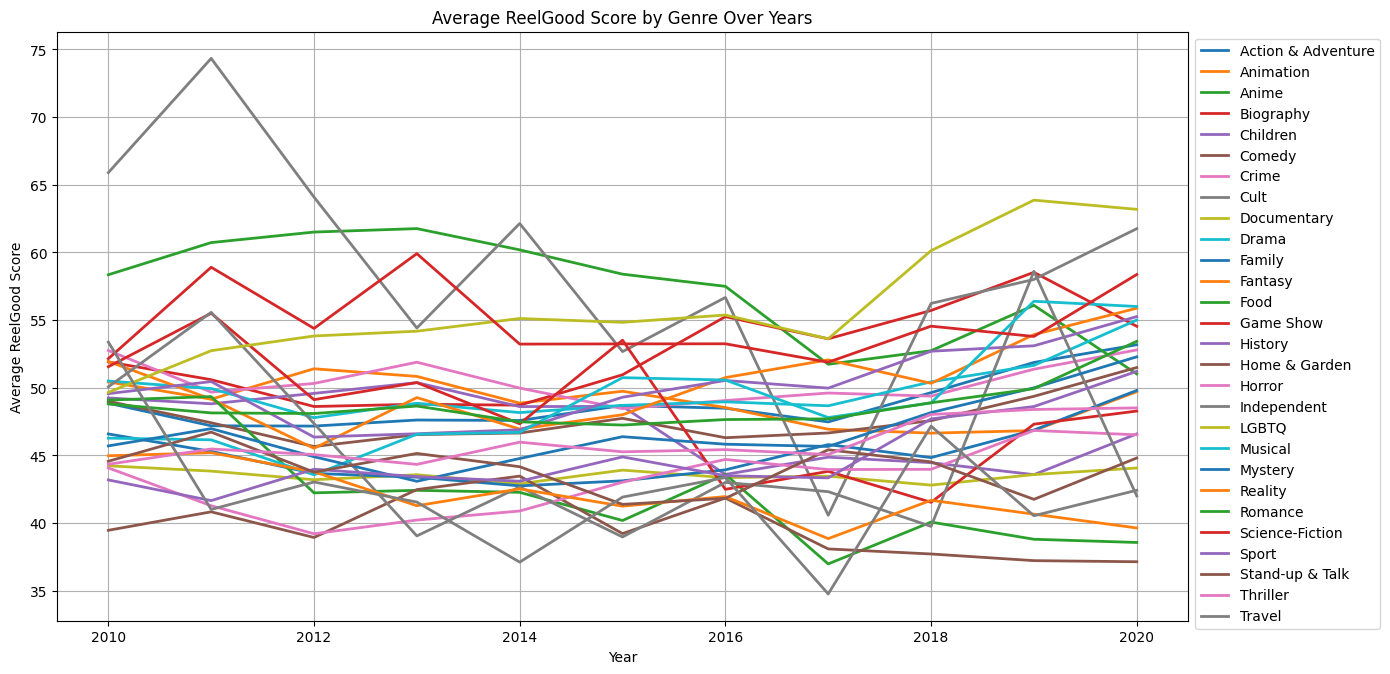

In [ ]:
import matplotlib.pyplot as plt

# Before plotting, let's ensure the data is grouped by 'Released Year' and 'Genre' and the index is reset
# so we can easily use these columns in the plot
reelgood_stats_reset = reelgood_stats.reset_index()

# Pivot the table to get years on the x-axis and genres as different lines
pivot_data = reelgood_stats_reset.pivot(index='Released Year', columns='Genre', values='mean')

# Adjusting the plot to move the legend outside of the chart

plt.figure(figsize=(14, 7))

# Plot a line for each genre
for genre in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[genre], marker='', linewidth=2, label=genre)

# Move the legend outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.xlabel('Year')
plt.ylabel('Average ReelGood Score')
plt.title('Average ReelGood Score by Genre Over Years')
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()



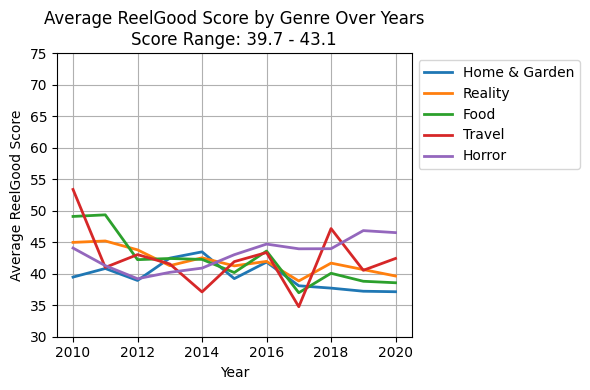

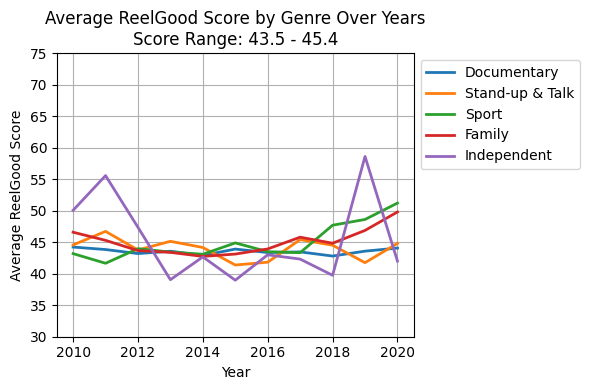

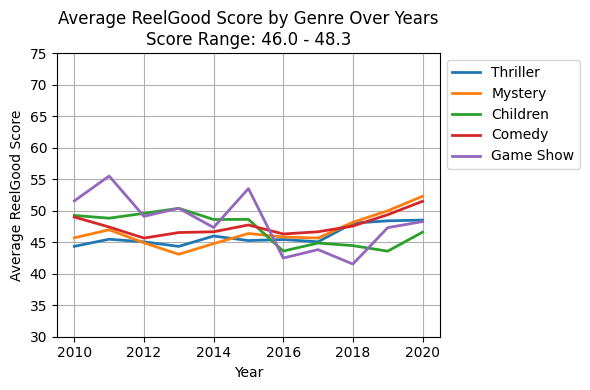

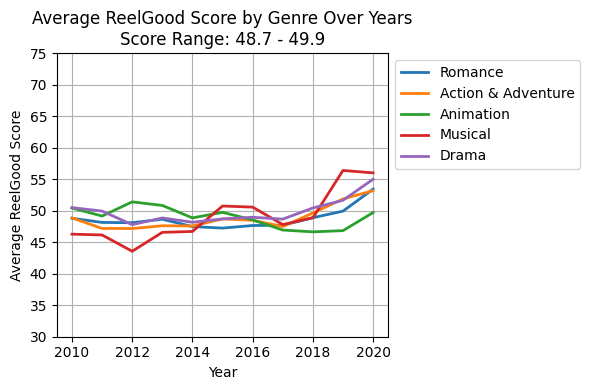

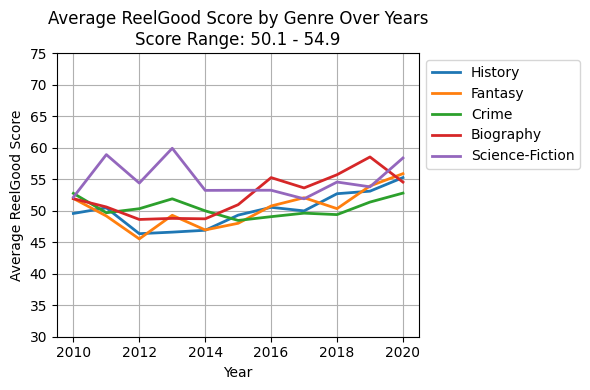

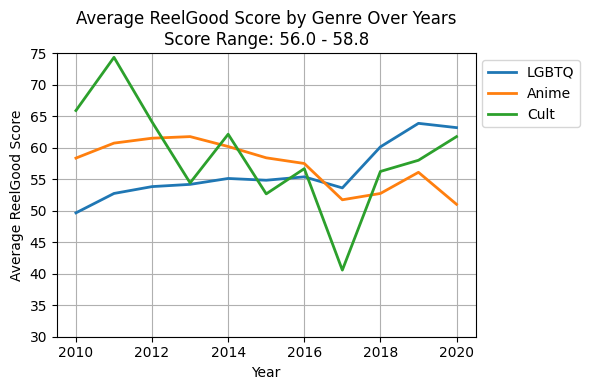

In [ ]:
# To create several charts with a manageable number of genres in each, we first need to determine the range of averages
# and then group the genres with similar ranges together.

# We will create a dictionary to hold the genres grouped by their average score ranges.
genre_groups = {}
number_of_genres_per_chart = 5

# Calculate the overall average across all years for each genre to determine the grouping
overall_avg = pivot_data.mean().sort_values()

# Create groups of genres with similar average score ranges
for i in range(0, len(overall_avg), number_of_genres_per_chart):
    genres = overall_avg.index[i:i + number_of_genres_per_chart]
    group_key = f"{overall_avg[genres[0]]:.1f} - {overall_avg[genres[-1]]:.1f}"
    genre_groups[group_key] = genres

# Now let's plot each group of genres in a separate chart
for group, genres in genre_groups.items():
    plt.figure(figsize=(6, 4))

    for genre in genres:
        if genre in pivot_data.columns:
            plt.plot(pivot_data.index, pivot_data[genre], marker='', linewidth=2, label=genre)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
    plt.xlabel('Year')
    plt.ylabel('Average ReelGood Score')
    plt.title(f'Average ReelGood Score by Genre Over Years\nScore Range: {group}')
    plt.grid(True)
    plt.ylim(30, 75)  # Set y-axis range
    plt.tight_layout()
    plt.show()


In [ ]:
# Count the number of titles for each genre, broken down by year
genre_year_count_2010_onwards = data_service_2010.groupby(['Genre', 'Released Year']).size().unstack(fill_value=0)

# To sort the years in descending order, we'll sort the columns of the DataFrame
genre_year_count_2010_onwards = genre_year_count_2010_onwards[sorted(genre_year_count_2010_onwards.columns, reverse=True)]

# Display the count of titles for each genre by year, starting from 2010
genre_year_count_2010_onwards.head(20)  # Displaying the first 20 rows as a sample


Released Year,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Genre,,,,,,,,,,,
Action & Adventure,333,973,1307,1326,1368,1596,1568,1423,1294,1209,1016
Animation,187,584,651,523,553,570,525,453,450,424,318
Anime,70,170,220,167,141,152,130,98,110,90,55
Biography,43,188,187,340,362,483,542,487,382,282,270
Children,29,47,72,52,67,63,68,99,76,63,91
Comedy,592,1456,1731,2017,2072,2087,2183,2035,1792,1610,1190
Crime,257,584,754,784,775,658,792,679,649,589,505
Cult,4,8,22,14,6,18,15,17,24,3,9
Documentary,535,1160,1501,1704,1744,1811,1897,1924,1819,1323,1035


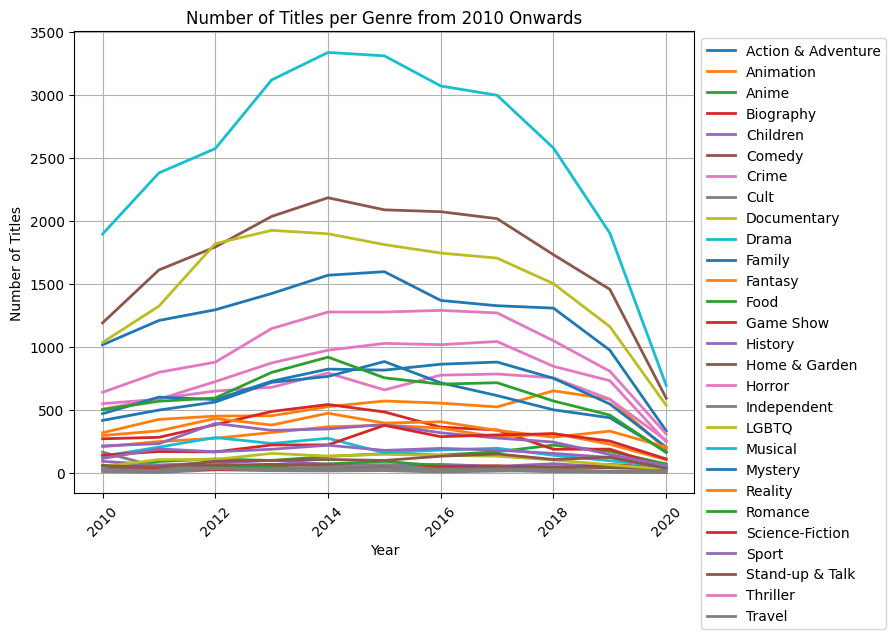

In [ ]:
# Since the user requested a line chart for the genre counts from 2010 onwards, let's plot that.

# Plotting a line chart for each genre showing the count of titles from 2010 onwards
plt.figure(figsize=(8, 6))

# Plot a line for each genre
for genre in genre_year_count_2010_onwards.index:
    plt.plot(genre_year_count_2010_onwards.columns,
             genre_year_count_2010_onwards.loc[genre],
             marker='', linewidth=2, label=genre)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.title('Number of Titles per Genre from 2010 Onwards')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 1: Calculate the total number of titles per genre from 2010 onwards
total_titles_per_genre = genre_year_count_2010_onwards.sum(axis=1)

# Step 2: Sort genres by total titles
sorted_genres_by_titles = total_titles_per_genre.sort_values(ascending=False)

# Step 3: Divide into three groups for plotting
group_size = len(sorted_genres_by_titles) // 3
group1 = sorted_genres_by_titles.iloc[:group_size]
group2 = sorted_genres_by_titles.iloc[group_size:2*group_size]
group3 = sorted_genres_by_titles.iloc[2*group_size:]

# Display the groups to see which genres are in each
group1, group2, group3


(Genre
 Drama                 27849
 Comedy                18765
 Documentary           16453
 Action & Adventure    13413
 Thriller              10732
 Horror                 8609
 Mystery                7256
 Crime                  7026
 Romance                6739
 dtype: int64,
 Genre
 Family             6273
 Animation          5238
 Reality            3867
 Biography          3566
 Fantasy            3072
 History            2948
 Science-Fiction    2555
 Musical            1939
 Sport              1744
 dtype: int64,
 Genre
 Anime              1403
 LGBTQ              1158
 Stand-up & Talk    1044
 Children            727
 Food                593
 Home & Garden       525
 Game Show           469
 Independent         387
 Travel              336
 Cult                140
 dtype: int64)

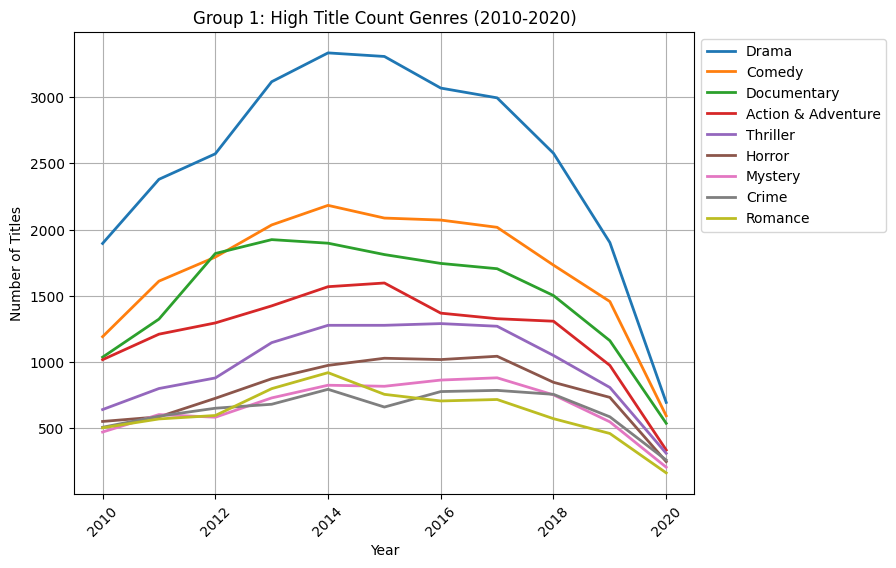

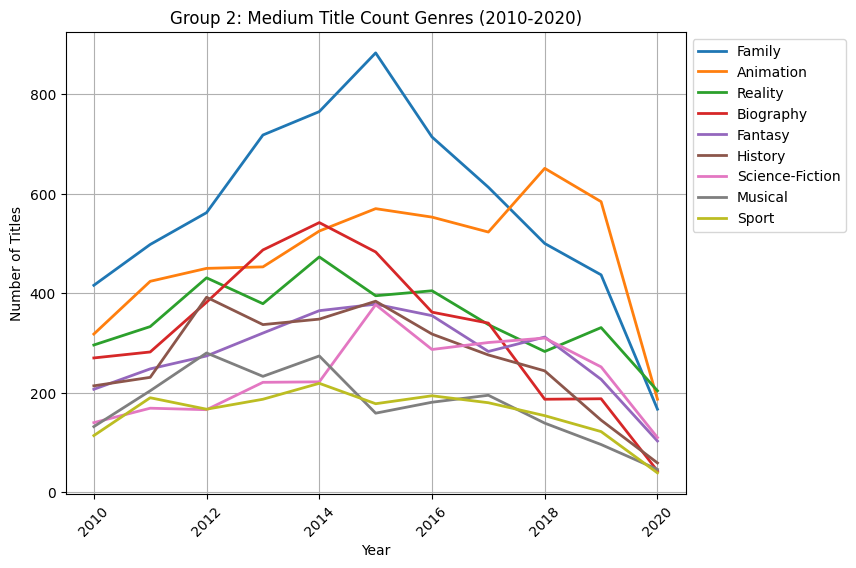

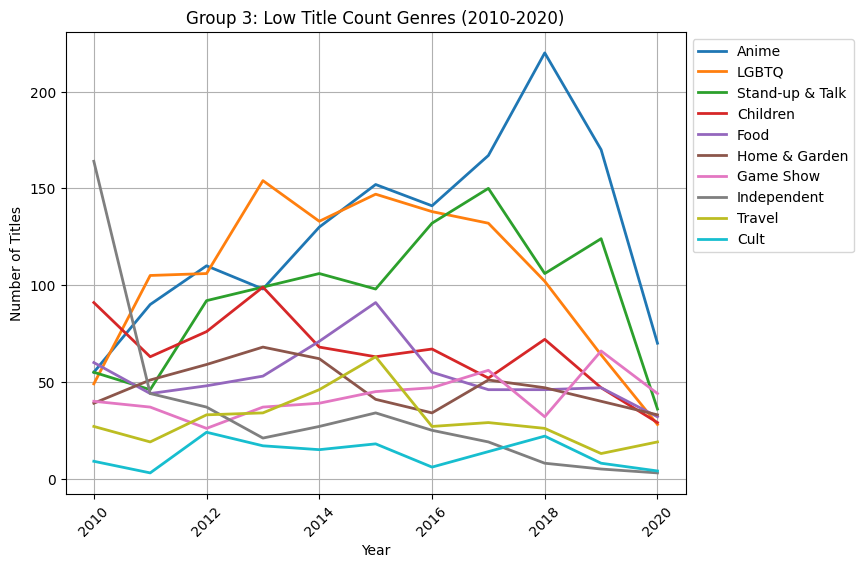

In [ ]:
# Define a function to plot each group of genres
def plot_genre_group(group, title):
    plt.figure(figsize=(8, 6))
    for genre in group.index:
        plt.plot(genre_year_count_2010_onwards.columns,
                 genre_year_count_2010_onwards.loc[genre],
                 marker='', linewidth=2, label=genre)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Number of Titles')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Plot each group
plot_genre_group(group1, "Group 1: High Title Count Genres (2010-2020)")
plot_genre_group(group2, "Group 2: Medium Title Count Genres (2010-2020)")
plot_genre_group(group3, "Group 3: Low Title Count Genres (2010-2020)")


In [ ]:
# loaded the dataset without genre, tag
data_service = '/content/drive/MyDrive/DSO574/Final Project- streaming/Reel Good Data (Title+Service).csv'
data_service = pd.read_csv(data_service)
# data_service.columns
data_service.sort_values(by=['Unnamed: 0', 'Title']).head(15)


<ipython-input-29-73679b565fec>:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_service = pd.read_csv(data_service)


,Unnamed: 0,Title,URL,Type,Service,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
0,0,Breaking Bad,/show/breaking-bad-2008,tv,netflix,9.5,100.0,18+,TV-MA,2008,2008-2020,5.0,"When Walter White, a New Mexico chemistry teac...",62 episodes (100%) are available to stream on ...,1,0,1
1,10,Game of Thrones,/show/game-of-thrones-2011,tv,hbo_max,9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
2,28,Game of Thrones,/show/game-of-thrones-2011,tv,hbo,9.3,98.0,18+,TV-MA,2011,2011-2020,8.0,Seven noble families fight for control of the ...,74 episodes (100%) are available to stream on ...,1,0,1
3,46,Rick and Morty,/show/rick-and-morty-2013,tv,free,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
4,62,Rick and Morty,/show/rick-and-morty-2013,tv,hbo_max,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
5,78,Rick and Morty,/show/rick-and-morty-2013,tv,hulu_plus,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
6,94,Rick and Morty,/show/rick-and-morty-2013,tv,fubo_tv,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
7,110,Rick and Morty,/show/rick-and-morty-2013,tv,hoopla,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
8,126,Rick and Morty,/show/rick-and-morty-2013,tv,adult_swim_tveverywhere,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1
9,142,Rick and Morty,/show/rick-and-morty-2013,tv,adult_swim,9.2,96.0,18+,TV-MA,2013,2013-2020,4.0,Rick is a mentally-unbalanced but scientifical...,5 episodes (12%) are available to watch free o...,1,0,1


In [ ]:
print(len(data))
print(len(data_service))

287834
137002


In [ ]:
duplicates_all = data_service[data_service.duplicated()]
duplicates_all

,Unnamed: 0,Title,URL,Type,Service,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag


In [ ]:
duplicates_subset = data_service[data_service.duplicated(subset=['Title', 'Service'], keep=False)]
sorted_duplicates_subset = duplicates_subset.sort_values(by=['Title', 'Service'])
sorted_duplicates_subset.head(10)

# seems like only unnamed 0 & reelGood different

,Unnamed: 0,Title,URL,Type,Service,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
71627,320721,$5 a Day,/movie/5-a-day-2008,movies,free,6.3,44.0,13+,NaN,2008,NaN,NaN,NaN,NaN,1,0,0
71628,320722,$5 a Day,/movie/5-a-day-2008,movies,free,6.3,45.0,13+,NaN,2008,NaN,NaN,NaN,NaN,1,0,0
71631,320725,$5 a Day,/movie/5-a-day-2008,movies,plutotv,6.3,44.0,13+,NaN,2008,NaN,NaN,NaN,NaN,1,0,0
71632,320726,$5 a Day,/movie/5-a-day-2008,movies,plutotv,6.3,45.0,13+,NaN,2008,NaN,NaN,NaN,NaN,1,0,0
71629,320723,$5 a Day,/movie/5-a-day-2008,movies,tubi_tv,6.3,44.0,13+,NaN,2008,NaN,NaN,NaN,NaN,1,0,0
71630,320724,$5 a Day,/movie/5-a-day-2008,movies,tubi_tv,6.3,45.0,13+,NaN,2008,NaN,NaN,NaN,NaN,1,0,0
91115,375274,'Neath Brooklyn Bridge,/movie/neath-brooklyn-bridge-1942,movies,amazon_prime,5.8,37.0,NaN,NaN,1942,NaN,NaN,The East Side Kids find a young girl in the ap...,Available to stream on a popular subscription ...,1,0,1
91116,375278,'Neath Brooklyn Bridge,/movie/neath-brooklyn-bridge-1942,movies,amazon_prime,5.8,39.0,NaN,NaN,1942,NaN,NaN,The East Side Kids find a young girl in the ap...,Available to stream on a popular subscription ...,1,0,1
91117,375280,'Neath Brooklyn Bridge,/movie/neath-brooklyn-bridge-1942,movies,epix,5.8,37.0,NaN,NaN,1942,NaN,NaN,The East Side Kids find a young girl in the ap...,Available to stream on a popular subscription ...,1,0,1
91118,375284,'Neath Brooklyn Bridge,/movie/neath-brooklyn-bridge-1942,movies,epix,5.8,39.0,NaN,NaN,1942,NaN,NaN,The East Side Kids find a young girl in the ap...,Available to stream on a popular subscription ...,1,0,1


In [ ]:
data_service_unique = data_service.drop_duplicates(subset=['Title', 'Service'], keep='first')
check = data_service_unique[data_service_unique.duplicated(subset=['Title', 'Service'], keep=False)]
check

,Unnamed: 0,Title,URL,Type,Service,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag


In [ ]:
data_service_unique.describe()

,Unnamed: 0,IMDB,ReelGood,Released Year,Seasons,Rent or Buy Available,Exclusive Service,Has Tag
count,125118.000000,122188.000000,124426.000000,125118.000000,8835.000000,125118.000000,125118.000000,125118.000000
mean,277583.863161,6.132825,47.244788,2003.061814,4.437125,0.843316,0.211081,0.472962
std,143478.657272,1.359569,15.526837,19.995301,5.861814,0.363504,0.408077,0.499270
min,0.000000,1.000000,10.000000,1900.000000,1.000000,0.000000,0.000000,0.000000
25%,157376.750000,5.300000,35.000000,2000.000000,1.000000,1.000000,0.000000,0.000000
50%,305902.500000,6.300000,44.000000,2011.000000,3.000000,1.000000,0.000000,0.000000
75%,403873.750000,7.100000,59.000000,2015.000000,5.000000,1.000000,0.000000,1.000000
max,480098.000000,10.000000,100.000000,2020.000000,86.000000,1.000000,1.000000,1.000000


In [ ]:
# only 2010~2020
data_service_unique_10years = data_service_unique[data_service_unique["Released Year"] >= 2010]


In [ ]:
df_service_count = data_service_unique_10years["Service"].value_counts()

In [ ]:
exclusive = data_service_unique_10years[data_service_unique_10years["Exclusive Service"] == 1]
exclusive["Service"].value_counts().head(20)

Service
Rent or Buy          7928
netflix              2591
amazon_prime          485
philo                 371
fandor                209
hulu_plus             205
kanopy                123
disney_plus           116
hoopla                 83
britbox                80
hbo_max                66
starz                  52
revry                  42
criterion_channel      38
epix                   38
shudder                34
hbo                    32
apple_tv_plus          27
fubo_tv                21
sundancenow            20
Name: count, dtype: int64

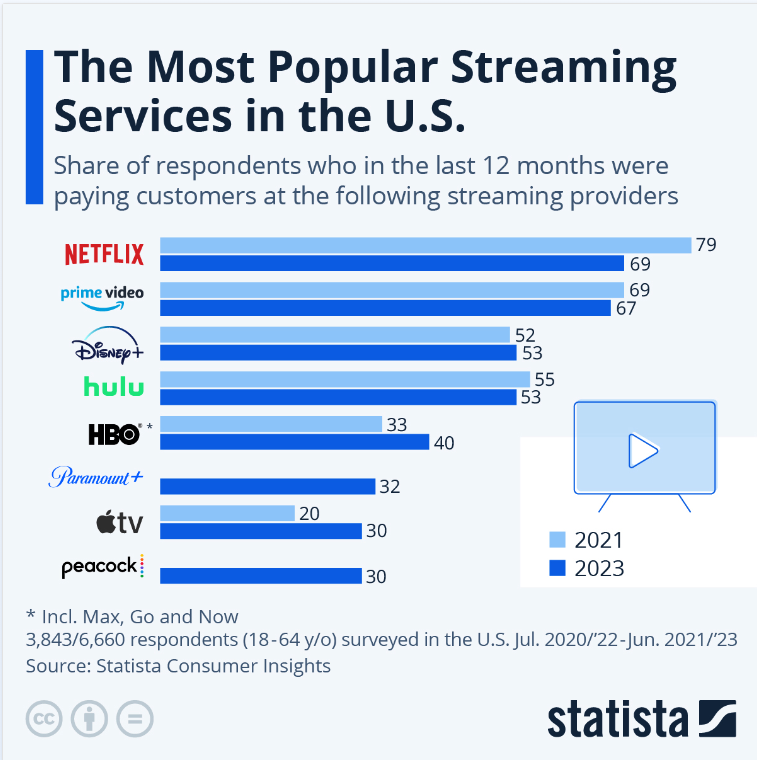

https://www.statista.com/chart/25382/most-used-video-streaming-platforms/


In [ ]:
# Assuming data_service_unique_10years and data_service_unique have been defined previously

# Get the total counts of all services
total_service_count = data_service_unique_10years["Service"].value_counts()

# Get the count of exclusive services
exclusive_service_count = data_service_unique_10years[data_service_unique_10years["Exclusive Service"] == 1]["Service"].value_counts()

# Calculate the percentage of exclusive services
exclusive_percentage = exclusive_service_count / total_service_count * 100

# Sort the percentages in descending order
exclusive_percentage_sorted = exclusive_percentage.sort_values(ascending=False)

# The result will be a Series with the percentage of exclusive content for each service
print(exclusive_percentage_sorted.head(20))

Service
Rent or Buy            100.000000
apple_tv_plus          100.000000
netflix                 60.864459
revry                   58.333333
wwe_network             57.142857
britbox                 54.054054
nbc_universo            40.000000
youtube_premium         32.653061
fandor                  32.403101
disney_plus             30.446194
philo                   29.328063
criterion_channel       25.165563
telemundo_now           20.000000
shudder                 14.847162
acorntv                 14.634146
bet_plus                14.516129
starz                   13.612565
hulu_plus               13.346354
discovery_life_go       12.500000
hallmark_everywhere     11.111111
Name: count, dtype: float64


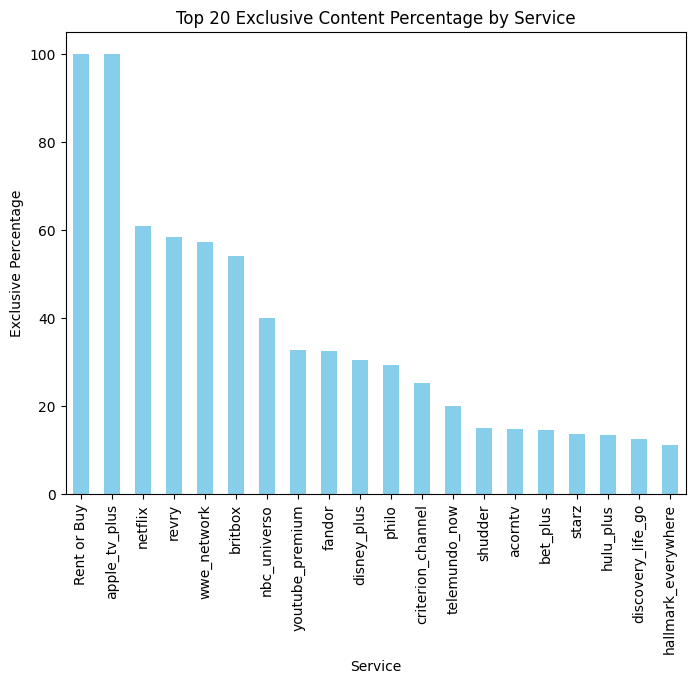

In [ ]:
import matplotlib.pyplot as plt

# Plot the results in a bar chart directly from the Series
plt.figure(figsize=(8, 6))
exclusive_percentage_sorted.head(20).plot(kind='bar', color='skyblue')
plt.xlabel('Service')
plt.ylabel('Exclusive Percentage')
plt.title('Top 20 Exclusive Content Percentage by Service')
plt.xticks(rotation=90)
plt.show()



## **What type of content is not currently being offered? Where is there a potential gap?**

### Step 1: Top 10 Genres Based on Average ReelGood Score (2016-2020), Including Video Count


In [ ]:
# Combine 'hbo' and 'hbo_max' into 'HBO'
data['Service'].replace({'hbo': 'HBO', 'hbo_max': 'HBO'}, inplace=True)

# Filter data for 2016 to 2020
data_2016_2020 = data[(data['Released Year'] >= 2016) & (data['Released Year'] <= 2020)]

# Step 1: Identify Top 10 Genres Based on Average ReelGood Score
average_scores = data_2016_2020.groupby('Genre')['ReelGood'].mean().sort_values(ascending=False)
top_genres = average_scores.head(10).index

# Calculate the number of titles per genre
genre_title_counts = data_2016_2020[data_2016_2020['Genre'].isin(top_genres)].groupby('Genre').size()

# Combine average score and title counts into a DataFrame
genre_analysis = pd.DataFrame({
    'Average ReelGood Score': average_scores[top_genres],
    'Number of Titles': genre_title_counts
}).sort_values(by='Average ReelGood Score', ascending=False)

genre_analysis

,Average ReelGood Score,Number of Titles
Genre,,
LGBTQ,57.702355,467
Biography,55.467199,1132
Anime,53.973958,768
Science-Fiction,53.807874,1270
Cult,52.888889,54
Fantasy,52.024050,1291
History,51.511154,1042
Musical,50.668189,658
Drama,49.976276,11407


In [ ]:
data_2016_2020.to_csv('/content/drive/MyDrive/DSO574/Final Project- streaming/streaming_data_2016_2020.csv')


### Step 2: Calculate the Percentage of Titles in Top 10 Genres for Major Streamers

In [ ]:
major_streamers = ['netflix', 'amazon_prime', 'hulu_plus']
streamer_data = data_2016_2020[data_2016_2020['Service'].isin(major_streamers) & data_2016_2020['Genre'].isin(top_genres)]

streamer_genre_counts = streamer_data.groupby('Service').size()
streamer_total_counts = data_2016_2020[data_2016_2020['Service'].isin(major_streamers)].groupby('Service').size()
streamer_genre_percentages = (streamer_genre_counts / streamer_total_counts * 100).sort_values(ascending=False)
streamer_genre_percentages

Service
hulu_plus       36.008024
netflix         34.610596
amazon_prime    34.145681
dtype: float64

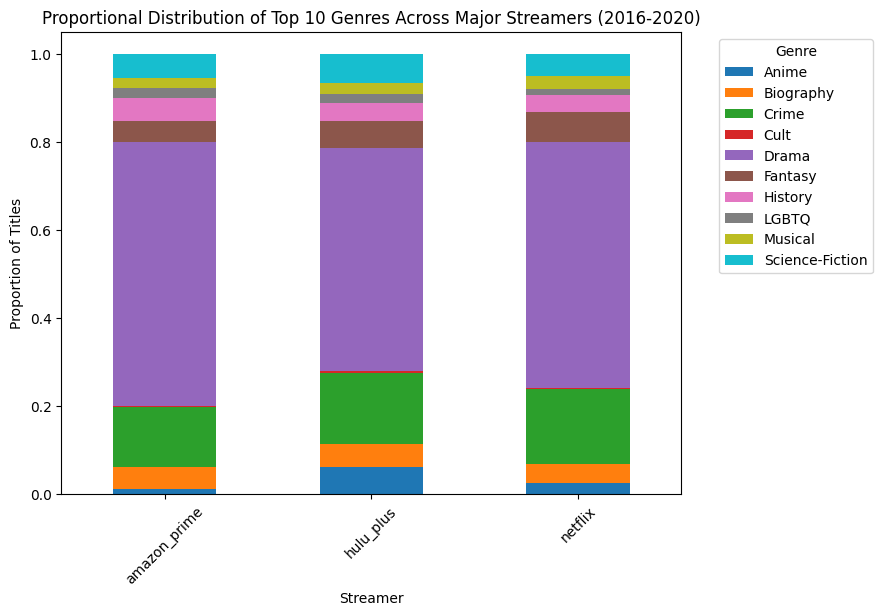

In [ ]:
import matplotlib.pyplot as plt

# Calculate counts of titles for each genre within each major streamer
genre_streamer_counts = streamer_data.groupby(['Service', 'Genre']).size().unstack(fill_value=0)

# Normalize these counts to get proportions
genre_streamer_proportions = genre_streamer_counts.div(streamer_genre_counts, axis=0)

# Plot these proportions using a stacked bar chart
genre_streamer_proportions.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proportional Distribution of Top 10 Genres Across Major Streamers (2016-2020)')
plt.xlabel('Streamer')
plt.ylabel('Proportion of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


### Step 3: Calculate the Percentage of Exclusive Titles in Top 10 Genres


In [ ]:
exclusive_data = streamer_data[streamer_data['Exclusive Service'] == 1]
exclusive_counts = exclusive_data.groupby('Service').size()
exclusive_percentages = (exclusive_counts / streamer_total_counts * 100).sort_values(ascending=False)
exclusive_percentages

Service
netflix         23.059898
amazon_prime     3.669104
hulu_plus        3.109328
dtype: float64

<Figure size 1400x700 with 0 Axes>

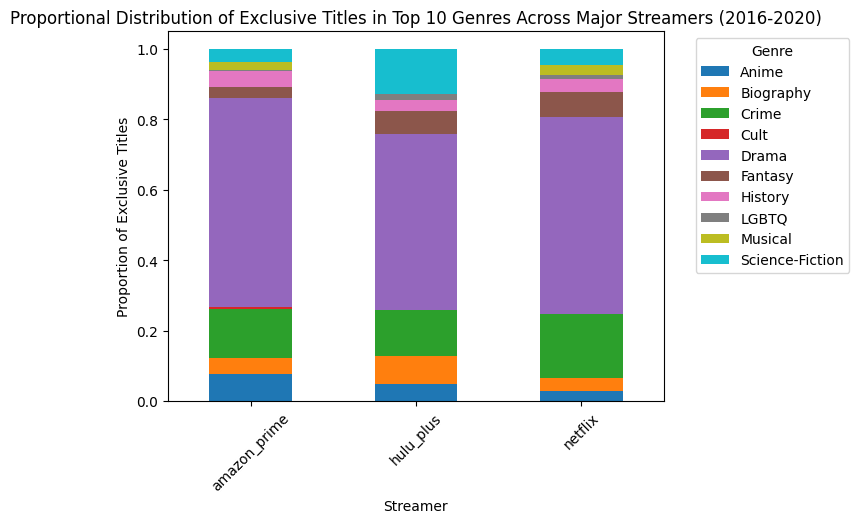

In [ ]:
# Define the dataset for exclusive titles within the top genres, making sure the data is filtered correctly
exclusive_data = streamer_data[streamer_data['Exclusive Service'] == 1]

# Calculate counts of exclusive titles for each genre within each major streamer
exclusive_genre_streamer_counts = exclusive_data.groupby(['Service', 'Genre']).size().unstack(fill_value=0)

# Get total counts of exclusive titles for each streamer to normalize data
streamer_exclusive_counts = exclusive_data.groupby('Service').size()

# Normalize these counts to get proportions
exclusive_genre_streamer_proportions = exclusive_genre_streamer_counts.div(streamer_exclusive_counts, axis=0)

# Plot these proportions using a stacked bar chart
plt.figure(figsize=(14, 7))
exclusive_genre_streamer_proportions.plot(kind='bar', stacked=True)
plt.title('Proportional Distribution of Exclusive Titles in Top 10 Genres Across Major Streamers (2016-2020)')
plt.xlabel('Streamer')
plt.ylabel('Proportion of Exclusive Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


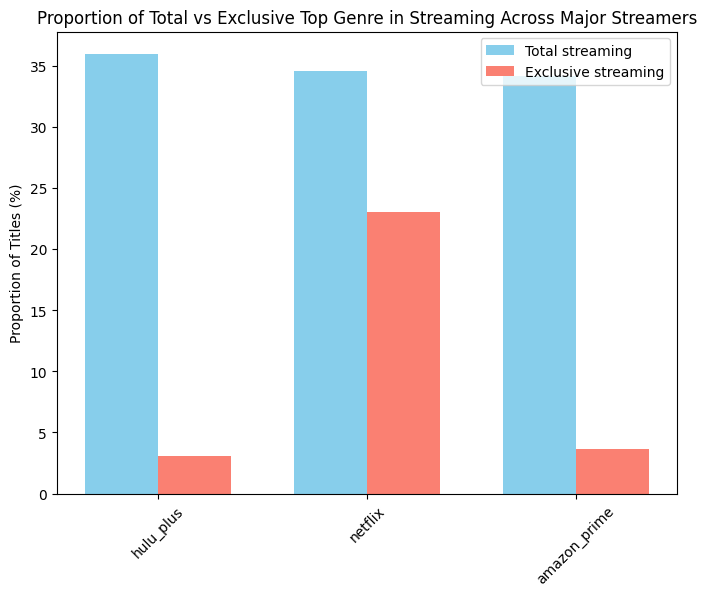

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following data from previous computations:
# streamer_genre_percentages and exclusive_percentages, indexed by streamer names

# Setting up the figure for plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate positions for the bar groups
ind = np.arange(len(streamer_genre_percentages))  # the x locations for the groups

# Width of the bars
width = 0.35

# Plotting the bars for total and exclusive titles
ax.bar(ind - width/2, streamer_genre_percentages.values, width, label='Total streaming', color='skyblue')
ax.bar(ind + width/2, exclusive_percentages.reindex(streamer_genre_percentages.index).values, width, label='Exclusive streaming', color='salmon')

# Adding labels and customizations
ax.set_ylabel('Proportion of Titles (%)')
ax.set_title('Proportion of Total vs Exclusive Top Genre in Streaming Across Major Streamers')
ax.set_xticks(ind)
ax.set_xticklabels(streamer_genre_percentages.index)
ax.legend()

plt.xticks(rotation=45)
plt.show()


In [ ]:
# Step 1: Calculate number of titles per genre and average score
genre_title_counts = data_2016_2020.groupby('Genre').size()
average_scores = data_2016_2020.groupby('Genre')['ReelGood'].mean()

# Combine data into a DataFrame
genre_analysis = pd.DataFrame({
    'Number of Titles': genre_title_counts,
    'Average ReelGood Score': average_scores
})

# Sort by number of titles (descending order)
genre_analysis = genre_analysis.sort_values(by='Number of Titles', ascending=False)

# Print the DataFrame
print(genre_analysis)

                    Number of Titles  Average ReelGood Score
Genre                                                       
Drama                          11407               49.976276
Comedy                          7904               47.618076
Documentary                     6654               43.348550
Action & Adventure              5352               49.458832
Thriller                        4750               46.566336
Horror                          3918               44.821848
Mystery                         3252               47.417924
Crime                           3167               49.969927
Romance                         2631               48.692395
Animation                       2505               47.423913
Family                          2451               45.591728
Reality                         1565               40.664052
Fantasy                         1291               52.024050
Science-Fiction                 1270               53.807874
Biography               

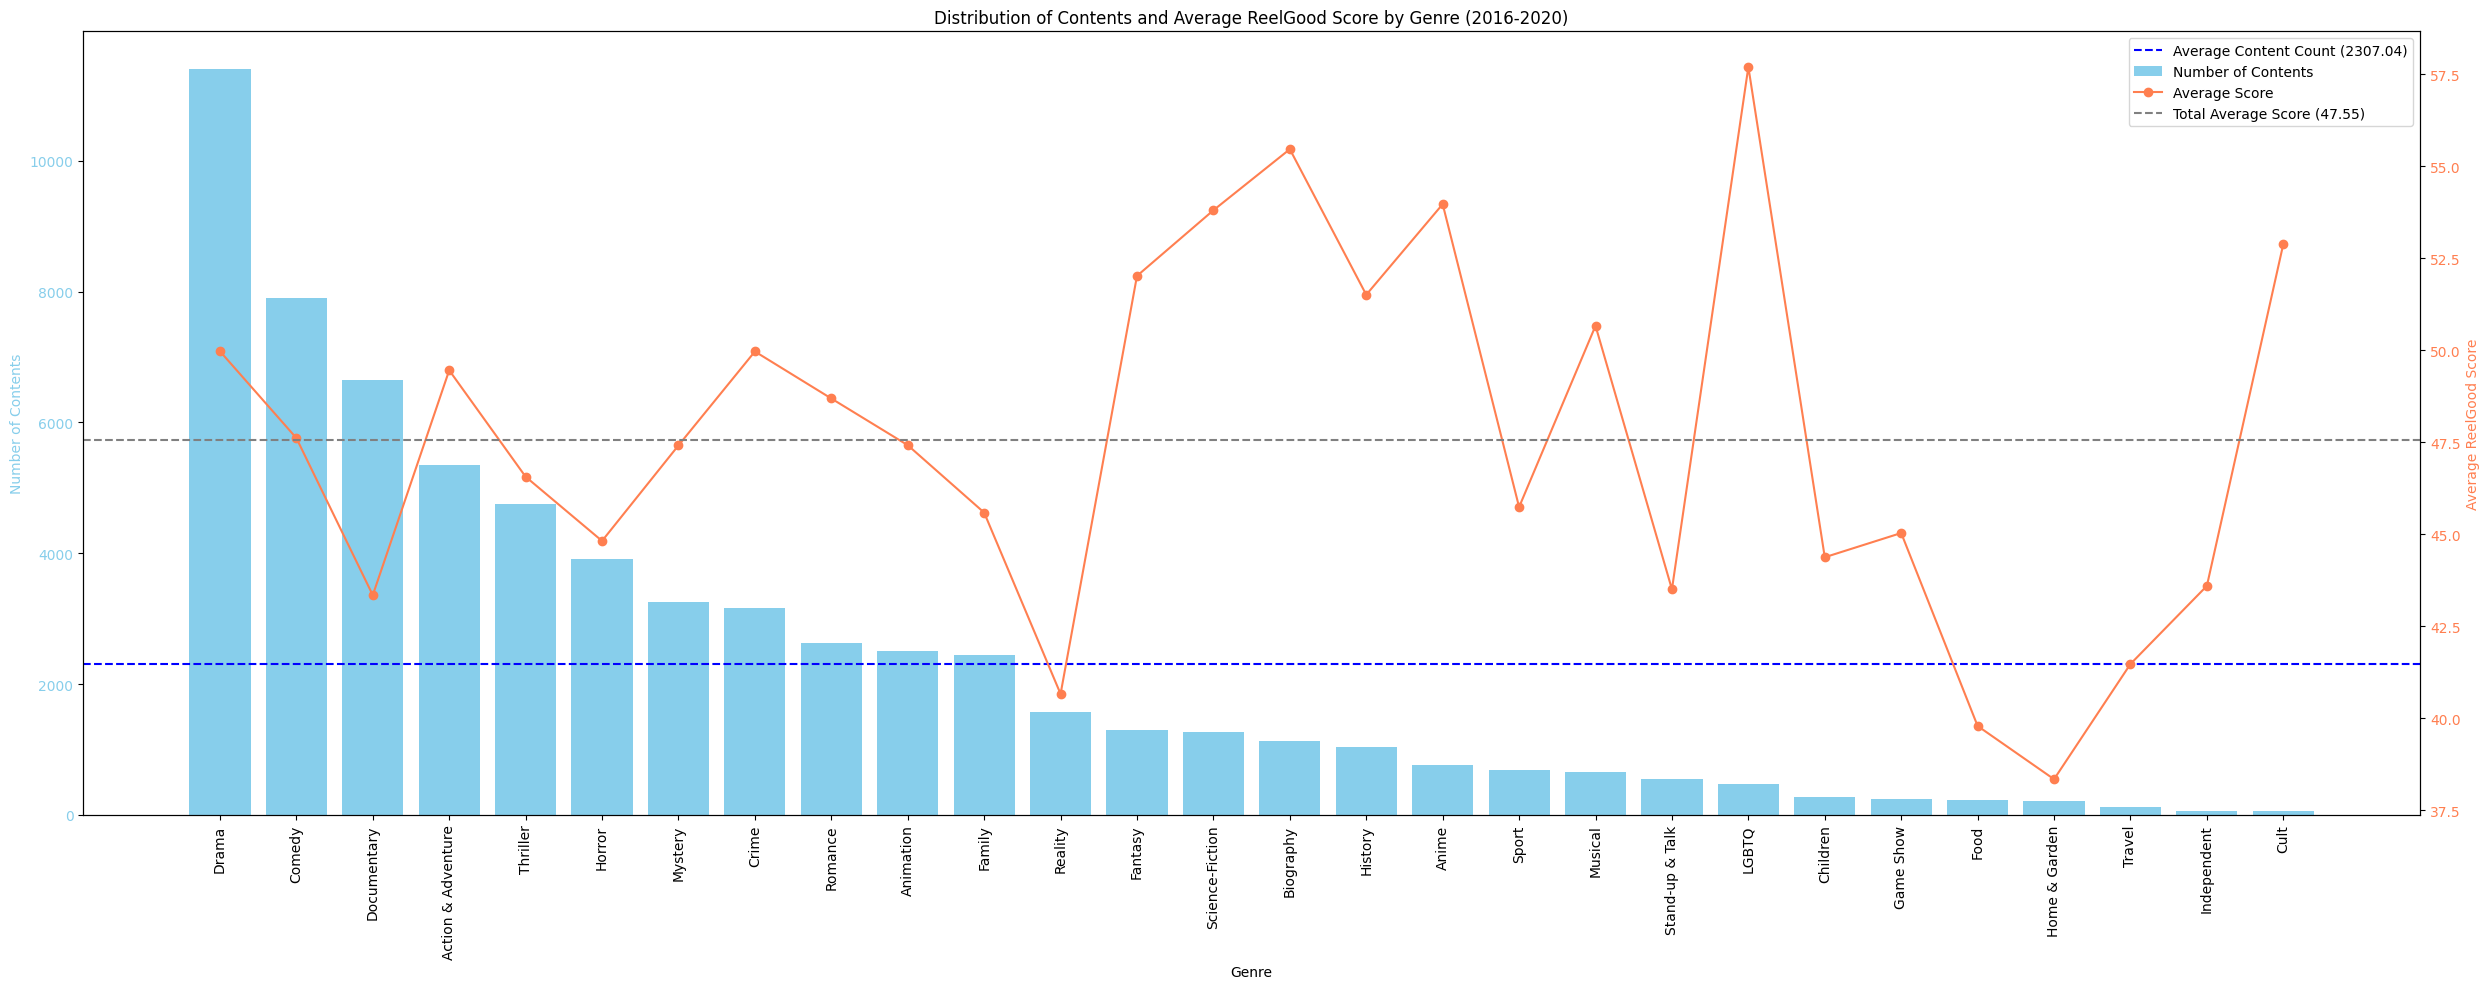

In [ ]:
import matplotlib.pyplot as plt


# Filter data for 2016 to 2020
data_2016_2020 = data[(data['Released Year'] >= 2016) & (data['Released Year'] <= 2020)]

# Calculate number of titles per genre and average score
genre_title_counts = data_2016_2020.groupby('Genre').size()
average_scores = data_2016_2020.groupby('Genre')['ReelGood'].mean()

# Total average score
total_avg_score = average_scores.mean()

# Calculate the total average of title counts
total_avg_title_count = genre_title_counts.mean()

# Sort genres by title count (descending order)
sorted_genres = genre_title_counts.sort_values(ascending=False).index

# Truncate genre names (if too long)
max_genre_len = 15  # Adjust this limit as needed
short_genres = [name[:max_genre_len] + "..." if len(name) > max_genre_len else name for name in sorted_genres]

# Create the plot
fig, ax1 = plt.subplots(figsize=(25, 10))  # Increase figure width

# Primary y-axis (bar chart) for title counts
ax1.bar(sorted_genres, genre_title_counts[sorted_genres], color='skyblue', label='Number of Contents')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Contents', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Add horizontal line for the average title count
ax1.axhline(total_avg_title_count, color='blue', linestyle='--', label=f'Average Content Count ({total_avg_title_count:.2f})')

# Secondary y-axis (line) for average scores
ax2 = ax1.twinx()  # Create a twin axis for the right side
ax2.plot(sorted_genres, average_scores[sorted_genres], color='coral', marker='o', linestyle='-', label='Average Score')
ax2.set_ylabel('Average ReelGood Score', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Add dotted line for total average score
ax2.axhline(total_avg_score, color='gray', linestyle='--', label=f'Total Average Score ({total_avg_score:.2f})')

# Customize the plot
plt.title('Distribution of Content and Average ReelGood Score by Genre (2016-2020)')

# Rotate x-axis labels
ax1.tick_params(axis='x', rotation=90)

# Legend
plt.legend()
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles=handles1 + handles2, labels=labels1 + labels2)

plt.title('Distribution of Contents and Average ReelGood Score by Genre (2016-2020)')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
streamer_data.head(10)

,Unnamed: 0,Title,URL,Type,Service,Genre,Tag,IMDB,ReelGood,AgeRating,Rated,Released Year,Duration Year,Seasons,What it's about,Where to Watch,Rent or Buy Available,Exclusive Service,Has Tag
36,36,Stranger Things,/show/stranger-things-2016,tv,netflix,Drama,"['Monster', 'Science', 'Supernatural', 'Suspen...",8.8,96.0,16+,TV-14,2016,2016-2020,4.0,"When a young boy vanishes, a small town uncove...",25 episodes (100%) are available to stream on ...,0,1,1
37,37,Stranger Things,/show/stranger-things-2016,tv,netflix,Fantasy,"['Monster', 'Science', 'Supernatural', 'Suspen...",8.8,96.0,16+,TV-14,2016,2016-2020,4.0,"When a young boy vanishes, a small town uncove...",25 episodes (100%) are available to stream on ...,0,1,1
51,51,The Boys,/show/the-boys-2019,tv,amazon_prime,Crime,"['Superhero', 'Spy', 'Comic Book', 'Supernatur...",8.7,95.0,18+,TV-MA,2019,2019-2020,2.0,A group of vigilantes known informally as “The...,14 episodes (100%) are available to stream on ...,1,0,1
134,134,Dark,/show/dark-2017,tv,netflix,Crime,"['Time Travel', 'Police']",8.8,94.0,16+,TV-14,2017,2017-2020,3.0,A missing child causes four families to help e...,26 episodes (100%) are available to stream on ...,0,1,1
135,135,Dark,/show/dark-2017,tv,netflix,Drama,"['Time Travel', 'Police']",8.8,94.0,16+,TV-14,2017,2017-2020,3.0,A missing child causes four families to help e...,26 episodes (100%) are available to stream on ...,0,1,1
226,226,Money Heist,/show/money-heist-2017,tv,netflix,Crime,['Mature'],8.4,91.0,18+,TV-MA,2017,2017-2020,3.0,"To carry out the biggest heist in history, a m...",38 episodes (100%) are available to stream on ...,0,1,1
231,231,Sex Education,/show/sex-education-2019,tv,netflix,Drama,"['Mature', 'Feel-good', 'Teen']",8.3,91.0,16+,TV-14,2019,2019-2020,3.0,Inexperienced Otis channels his sex therapist ...,16 episodes (100%) are available to stream on ...,0,1,1
233,233,Sex Education,/show/sex-education-2019,tv,netflix,LGBTQ,"['Mature', 'Feel-good', 'Teen']",8.3,91.0,16+,TV-14,2019,2019-2020,3.0,Inexperienced Otis channels his sex therapist ...,16 episodes (100%) are available to stream on ...,0,1,1
255,255,Mindhunter,/show/mindhunter-2017,tv,netflix,Crime,"['Serial Killer', 'Based On True Story', 'Psyc...",8.6,91.0,18+,TV-MA,2017,2017-2020,2.0,An agent in the FBI's Elite Serial Crime Unit ...,19 episodes (100%) are available to stream on ...,0,1,1
256,256,Mindhunter,/show/mindhunter-2017,tv,netflix,Drama,"['Serial Killer', 'Based On True Story', 'Psyc...",8.6,91.0,18+,TV-MA,2017,2017-2020,2.0,An agent in the FBI's Elite Serial Crime Unit ...,19 episodes (100%) are available to stream on ...,0,1,1


In [ ]:
# The genres we are interested in
genres_of_interest = ['Fantasy', 'Science-Fiction', 'Biography', 'History', 'Anime']

# Filter the dataframe for the genres of interest
filtered_data = streamer_data[streamer_data['Genre'].isin(genres_of_interest)]

# Count the number of titles in each service for the genres of interest
service_genre_counts = filtered_data.groupby('Service')['Genre'].value_counts().unstack(fill_value=0)

service_genre_counts


Genre,Anime,Biography,Fantasy,History,Science-Fiction
Service,,,,,
amazon_prime,29,128,119,130,138
hulu_plus,44,37,43,30,48
netflix,65,106,169,95,123


In [ ]:
# Filter exclusive content for the genres of interest
exclusive_genre_counts = exclusive_content[exclusive_content['Genre'].isin(genres_of_interest)].groupby(['Service', 'Genre']).size().unstack(fill_value=0)

# Calculate non-exclusive content (assuming 'service_genre_counts' has genre as the index)
non_exclusive_genre_counts = service_genre_counts.subtract(exclusive_genre_counts, fill_value=0)

# Combine exclusive and non-exclusive counts (optional)
combined_genre_counts = pd.concat([exclusive_genre_counts, non_exclusive_genre_counts], axis=1, keys=['Exclusive', 'Non-Exclusive'])

# Print the combined counts (if desired)
print(combined_genre_counts)

# Alternatively, access exclusive and non-exclusive counts separately:
total_exclusive_count = exclusive_genre_counts.sum().sum()  # Sum all exclusive titles
total_non_exclusive_count = non_exclusive_genre_counts.sum().sum()  # Sum all non-exclusive titles

total_exclusive_count
total_non_exclusive_count


             Exclusive                                            \
Genre            Anime Biography Fantasy History Science-Fiction   
Service                                                            
amazon_prime        21        12       9      12              10   
hulu_plus            3         5       4       2               8   
netflix             45        62     116      63              78   

             Non-Exclusive                                            
Genre                Anime Biography Fantasy History Science-Fiction  
Service                                                               
amazon_prime             8       116     110     118             128  
hulu_plus               41        32      39      28              40  
netflix                 20        44      53      32              45  


854

In [ ]:
combined_genre_counts.to_csv('/content/drive/MyDrive/DSO574/combined_genre_counts.csv', index=True)  # Include index for reference
